# Ejercicio 3: Array broadcasting y mesh grids. #
Como vimos en clases, Numpy es capaz de realizar operaciones entre arrays aplicando
broadcasting.

Revisar la documentación en https://numpy.org/doc/stable/user/theory.broadcasting.html y
https://numpy.org/doc/stable/user/basics.broadcasting.html.

Dentro de estas operaciones, se pueden construir las llamadas “mesh grids”, que son
cuadrículas 2d que permiten evaluar funciones de manera muy rápida y potente. Revise la
documentación en https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html,
especialmente el ejemplo al final. A partir de ello, genere un meshgrid (con sparse=True) y escriba una
función que evalúe una Gaussiana en 2 dimensiones, con parámetros de entrada el punto X,Y (que
serán los vectores de la meshgrid a evaluar), centro de la Gaussiana (Xc, Yc), sigma de la Gaussiana o,
de manera equivalente, el FWHM, y finalmente la altura del peak o intensidad I. La salida de esta función
será la superficie Z (en 2d) con la Gaussiana evaluada.

A partir de esta función, realizaremos un campo estelar sintético por medio de otra función que
tomará un numero de estrellas N y generará de manera aleatoria estas N estrellas dentro del meshgrid
(en realidad, esta función puede generar un meshgrid con límites Xmin,Xmax e Ymin,Ymax) y las
estrellas tendrán intensidades aleatorias dentro de algún rango razonable.
Muestre su resultado siguiendo el ejemplo de la documentación, para un campo de 10 estrellas.
Utilice un colormap en escala de grises.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

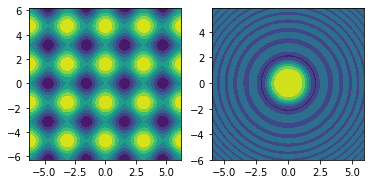

In [61]:
x=np.arange(-2*np.pi,2*np.pi,0.1)
y=np.arange(-2*np.pi,2*np.pi,0.1)

X,Y = np.meshgrid(x,y,sparse=True)
Z = np.cos(X)**2 +np.sin(Y)**2
f, axs = plt.subplots(1,2)

axs[0].contourf(x,y,Z)
axs[0].axis('scaled')

####EJEMPLO DE PAGINA ####
x = np.arange(-6, 6, 0.1)

y = np.arange(-6, 6, 0.1)

xx, yy = np.meshgrid(x, y, sparse=True)

z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

h = plt.contourf(x, y, z)

axs[1].axis('scaled')

plt.show()

escriba una función que evalúe una Gaussiana en 2 dimensiones, con parámetros de entrada el punto X,Y (que serán los vectores de la meshgrid a evaluar), centro de la Gaussiana (Xc, Yc), sigma de la Gaussiana o, de manera equivalente, el FWHM, y finalmente la altura del peak o intensidad I. La salida de esta función será la superficie Z (en 2d) con la Gaussiana evaluada.

sigma_x : 0.04722714980660481, sigma_y : 0.2920693265783416


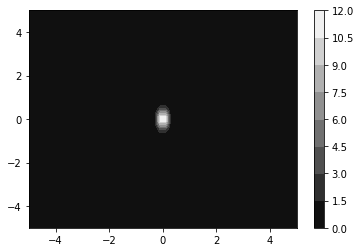

In [371]:
def gaus2d(x, y, xc, yc, sx, sy,I):
    return I / (2. * np.pi * sx * sy) * np.exp(-((x - xc)**2. / (2. * sx**2.) + (y - yc)**2. / (2. * sy**2.)))

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
xc,yc = (0,0)
#sx,sy=(1.5,1.5)
sx,sy=(np.random.rand(),np.random.rand())
print(f'sigma_x : {sx}, sigma_y : {sy}')
I=10
x, y = np.meshgrid(x, y)
z = gaus2d(x, y,xc,yc,sx,sy,I)


plt.contourf(x,y,z,cmap='gray')
plt.colorbar()
plt.show()

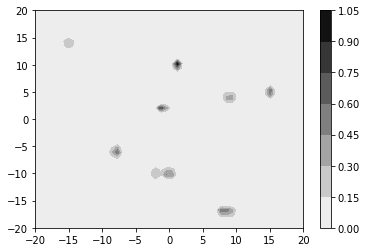

In [374]:
def gaus2d(x, y,xc,yc,I,n):
    
    #star1 = I / (2. * np.pi * sx * sy) * np.exp(-((x - xc)**2. / (2. * sx**2.) + (y - yc)**2. / (2. * sy**2.)))
    #PASAR DE 1 ESTRELLA A N ESTRELLAS  
    
    #sx,sy=(np.random.rand(n),np.random.rand(n))
    mu = 0.5
    sig = 0.2
    sx,sy =(mu + (sig * np.random.randn(10)),0.5 + (0.2 * np.random.randn(10)))
    
    #NOTAR QUE PODEMOS GENERAR DIFERENTES SIGMAS, PEEEEERO:
    #1) PRIMER METODO (rand): SE PUEDEN TOMAR VALORES MUY PEQUEÑOS Y PODRIAN DIFICULTAR LA VISUALISACION 
    #2) SEGUNDO METODO (randn): SE USA PARA VALORES ALEATORIOS DENTRO DE UNA DISTRIBUCION GAUSSIANA
    #2.1) VENTAJA 1: PUEDE CONFIGURARSE PARA DESPLAZAR EL CENTRO DE GAUSSIANA MU=0.5 Y EL SIGMA SIG=0.2
    #2.2) VENTAJA 2: SI QUISIERAMOS OBTENER VALORES MAS AMPLIOS SOLO AUMENTAMOS EL SIGMA(0.2) Y/O MOVEMOS EL MU(0.5)
    
    x, y = np.meshgrid(x, y,sparse=True)
    star = []
    for i in range(n):
        star += [I[i] / (2. * np.pi * sx[i] * sy[i]) * np.exp(-((x - xc[i])**2. / (2. * sx[i]**2.) + (y - yc[i])**2. / (2. * sy[i]**2.)))]

    return np.sum(star[:],axis=0)

#NUMERO DE ESTRELLAS n
n=10

x = np.linspace(-20, 20)
y = np.linspace(-20, 20)
xc,yc = (np.random.randint(min(x)+2,max(x)-2,n),np.random.randint(min(y)+2,max(y)-2,n))
sigma_int=0.2 #PARA INTENSIDADES MENOS PARECIDAS AUMENTAR SIGMA
I=1 + (sigma_int * np.random.randn(n)) #INTENSIDADES CON DISTRIBUCION ALEATORIA EN UNA GAUSSIANA CON CENTRO 1
mapa = gaus2d(x, y,xc,yc,I,n)
plt.contourf(x,y,mapa,cmap='gray_r')
plt.colorbar()
#plt.scatter(xc,yc,c='r',alpha=0.2,s=10) #CENTRO DE LAS ESTRELLAS (PARA SEGUIMIENTO)

(array([0.04740352, 0.07110527, 0.20146495, 0.31997374, 0.98362297,
        1.51691253, 1.61171956, 2.00279857, 2.02650033, 1.25619319,
        0.90066681, 0.5688422 , 0.24886846, 0.02370176, 0.07110527]),
 array([0.37132829, 0.45571022, 0.54009214, 0.62447407, 0.70885599,
        0.79323792, 0.87761984, 0.96200177, 1.04638369, 1.13076562,
        1.21514755, 1.29952947, 1.3839114 , 1.46829332, 1.55267525,
        1.63705717]),
 <BarContainer object of 15 artists>)

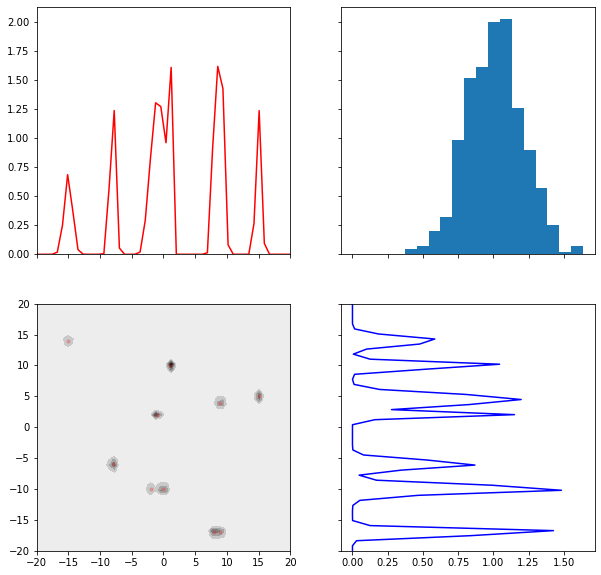

In [463]:
f, axs = plt.subplots(2,2,figsize=(10,10),sharex='col',sharey='row')
axs[1,0].contourf(x,y,mapa,cmap='gray_r')
#plt.colorbar()
axs[1,0].scatter(xc,yc,c='r',alpha=0.2,s=10) #CENTRO DE LAS ESTRELLAS (PARA SEGUIMIENTO) 


axs[1,1].plot(np.sum(np.abs(mapa),axis=1),x,c='b',)
axs[0,0].plot(x,np.sum(np.abs(mapa),axis=0),c='r')
#Mostramos tambien la distribucion gaussiana de la que se obtuvo I 
axs[0,1].hist(1 + (sigma_int * np.random.randn(1000)),bins=15,density=0.5)